### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<AxesSubplot:>

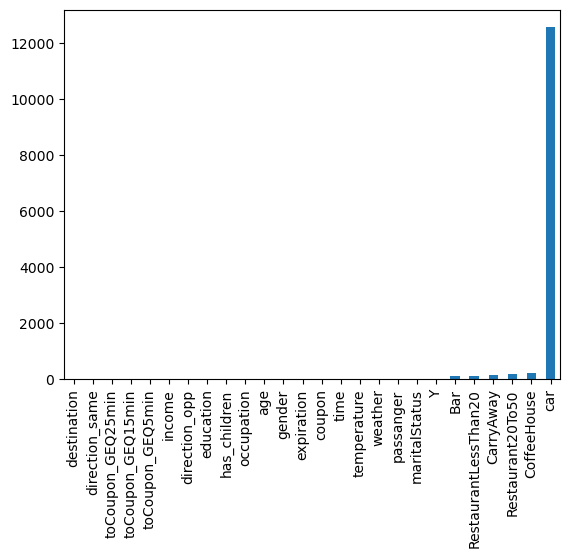

In [5]:
data.isnull().sum().sort_values().plot(kind = 'bar')

From the above chart and plot, we can see that the 'car' column has the most null values (in fact the majority of rows had NaN in that column). In addition, some of the personal dining habit question columns had a few null values. I want to look further into the data to see if those null values actually meant something.

In [22]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [23]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [24]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [25]:
data['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [26]:
data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [27]:
data['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

After looking at all the unique values of the "car" column I found that the null values do not mean that the participant does not drive nor driving but not having a car, since some of the valid values there covered those categories already. The reason for the overwhelming amount of null value was because the "car" information comes from an optional short answer question. For most surveys, this type of questions are most likely to be left unanswered. Thus we have no info about whether the majority of our participants have cars or not. Probability-wise I think most of them do have cars, but I don't know exactly who.

A similar type of cloud of uncertainty was achieved by those dining habit/spending frequency columns. From 'never' to 'greater than 8', the survey had all possible frequency range covered, so the null values (those who simply did not answer the question) cannot be regarded as any of the known frequencies. Fortunately this question was a multiple choice instead of a short answer type, only very few participants have left this empty. The size of the uncertainty fog is much smaller than that of the 'car' column.

3. Decide what to do about your missing data -- drop, replace, other...

Based on my reasoning above, I decide to leave the missing data as is. This is because dropping all the rows that have null data would mean losing a big chunk of our valuable survey result. Meanwhile, replacing them with any fixed values is also not appropriate because they can be anything. I will keep all the rows because they may carry meaningful data about other columns. When ploting about the concerned columns I can just ignore the group that is NaN, and the rest rows will still be a statistically large enough sample. Lastly, I will not analyze the "car" column at all since the low answering rate disqualifies it for any real conclusions.

4. What proportion of the total observations chose to accept the coupon? 



In [31]:
accept_rate = data[['Y']].sum() / 12684
print(accept_rate)

Y    0.568433
dtype: float64


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

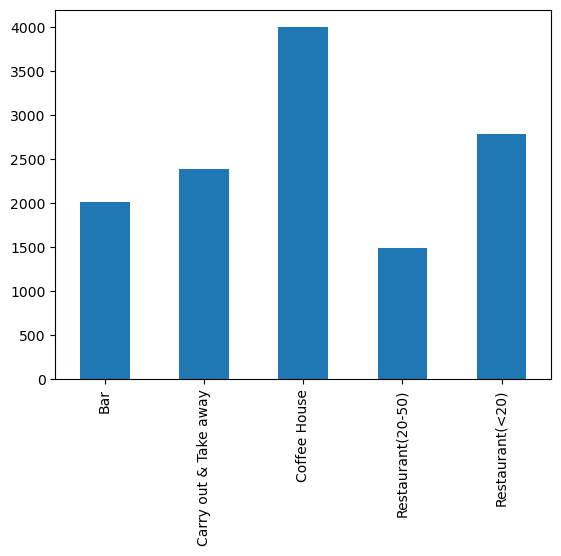

In [36]:
data['coupon'].value_counts().sort_index().plot(kind = 'bar')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

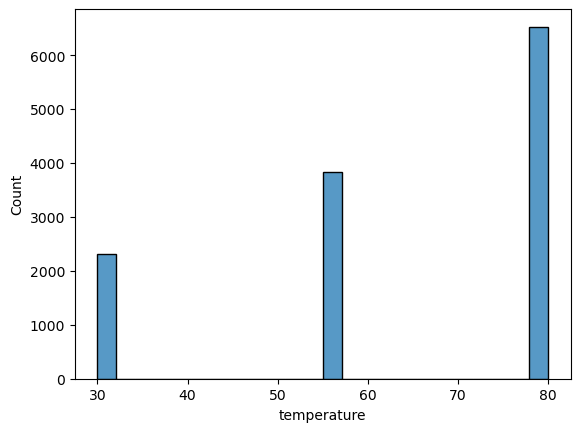

In [37]:
sns.histplot(data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [4]:
Bar_df = data[data['coupon'] == "Bar"]

2. What proportion of bar coupons were accepted?


In [41]:
Bar_df.shape

(2017, 26)

In [42]:
accepted = Bar_df[['Y']].sum() / 2017
print(accepted)

Y    0.410015
dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<AxesSubplot:xlabel='Bar', ylabel='Count'>

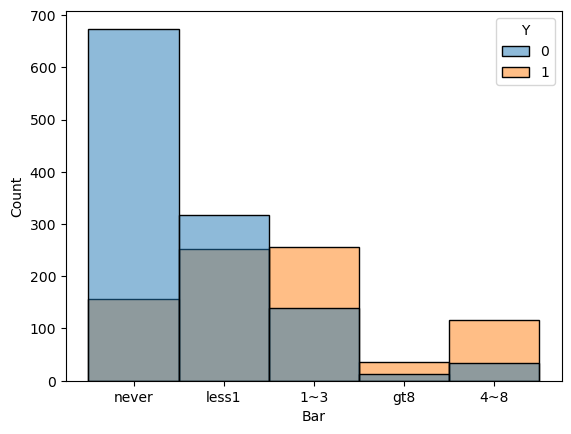

In [43]:
sns.histplot(Bar_df, x='Bar', hue = 'Y')

I used this simple line of code to visulize the acceptance rate comparison. We can clearly see that the acceptance rate of the bar coupon increased when people go to bar more often. Even though the exact numerical value of the rate require a few more lines of code, this graph itself is accurate enough for us to grab some quantitative infomation: There are more people going to bars less than once a month than those who went more. The acceptance rate for those who never went to bar is less than 20%, for those who went less than once a month is less than 50%, for 1-3 times is above 60%, and for those who went more than 4 times a month is over 75%. Conversely, if we only look at the acceptance rate between the 3 times or less and the 4 times or more groups, we will see fewer details from the data.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


We need a sub dataframe for this question to simplify our codes and output.

In [19]:
q4_df = Bar_df[['age','Bar','Y']]
q4_df.dropna()
q4_df.shape

(2017, 3)

In [21]:
q4_df.index = range(0,2017,1)

First I will need to find the groups over the age of 25.

In [22]:
q4_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

I see that most groups are over the age of 25 except the 21 and below21 groups. This way I can create a sub-dataframe for over25.

In [33]:
over25_df = q4_df[(q4_df['age'] != '21') & (q4_df['age'] != 'below21')]
over25_df.head()

,age,Bar,Y
6,46,never,0
7,46,never,0
8,46,never,0
9,46,less1,1
10,46,less1,1


Similarly, I can obtain a sub-dataframe for drivers who go to a bar more than once a month.

In [34]:
overOnce_df = q4_df[(q4_df['Bar'] != 'never') & (q4_df['Bar'] != 'less1')]
overOnce_df.head()

,age,Bar,Y
12,21,1~3,1
13,21,1~3,1
14,21,1~3,0
15,26,1~3,1
16,26,1~3,1


Merge the 2 dataframes using inner mode, we can get those who with the 'and' condition, and thus get the acceptance rate.

In [30]:
result4_df = pd.merge(over25_df, overOnce_df, left_index = True, right_index = True)
result4_df.shape

(440, 6)

Finally we can get the acceptance rate we are interested in question 4. It is around 68%, which is a lot higher than the 41% among all participants.

In [37]:
ans4 = result4_df[['Y_x']].sum() / 440
print(ans4)

Y_x    0.681818
dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  